### BUSINESS DECISION RESEARCH

In [2]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv',sep=';')

In [3]:
#menampilkan 5 data teratas
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [5]:
data['First_Transaction'] = pd.to_datetime(data['First_Transaction']/1000, unit='s', origin='1970-01-01')

In [6]:
data['Last_Transaction'] = pd.to_datetime(data['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [7]:
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


### Churn Customers

In [9]:
#pengecekan transaksi terakhir dalam dataset
print('Transaksi terakhir dalam Last_Transaction:\n',max(data['Last_Transaction']))

Transaksi terakhir dalam Last_Transaction:
 2019-02-01 23:57:57.286000128


In [10]:
#klasifikasikan customer yang berstatus churn atau tidak dengan boolean
data.loc[data['Last_Transaction']<='2018-08-01', 'is_churn'] = True
data.loc[data['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [11]:
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [12]:
#Hapus kolom yang tidak diperlukan (no,Row_Num)
del data['no']
del data['Row_Num']

In [13]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


### Customer acquisition by year

In [14]:
data['year_first_transaction'] = data['First_Transaction'].dt.year
data['year_last_transaction'] = data['Last_Transaction'].dt.year

In [15]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,year_first_transaction,year_last_transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018


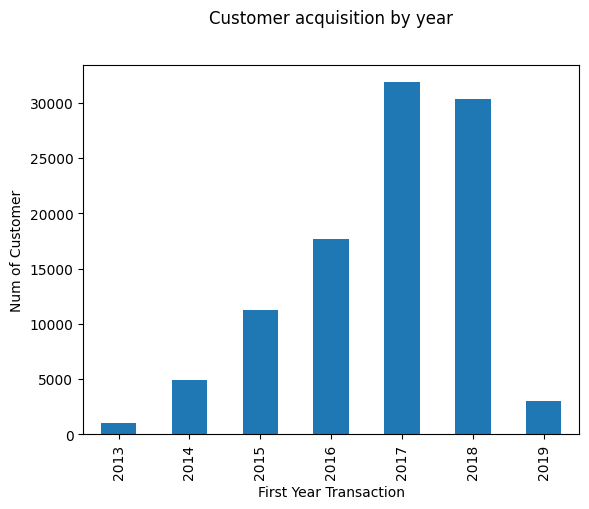

In [16]:
df_year = data.groupby(['year_first_transaction'])['Customer_ID'].count()
df_year.plot(x='year_first_transaction',y='Customer_ID',kind='bar')
plt.title('Customer acquisition by year',loc='center',pad=30)
plt.xlabel('First Year Transaction')
plt.ylabel('Num of Customer')
plt.show()

### Transaction by year

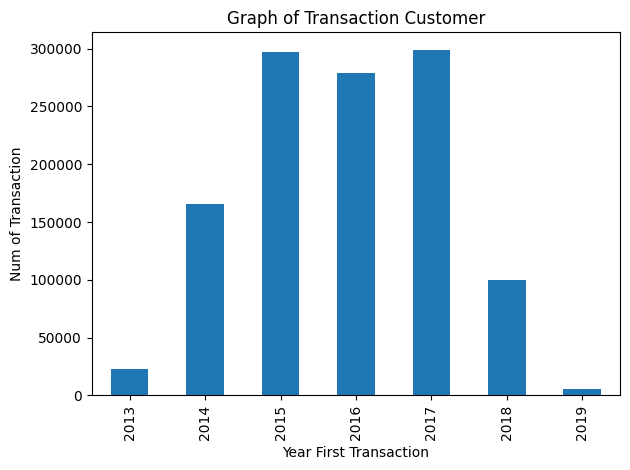

In [17]:
plt.clf()
data_year = data.groupby('year_first_transaction')['Count_Transaction'].sum()
data_year.plot(x='year_first_transaction',y='Count_Transaction',kind='bar')
plt.title('Graph of Transaction Customer')
plt.xlabel('Year First Transaction')
plt.ylabel('Num of Transaction')
plt.tight_layout()
plt.show()

### Average Transaction amount by year

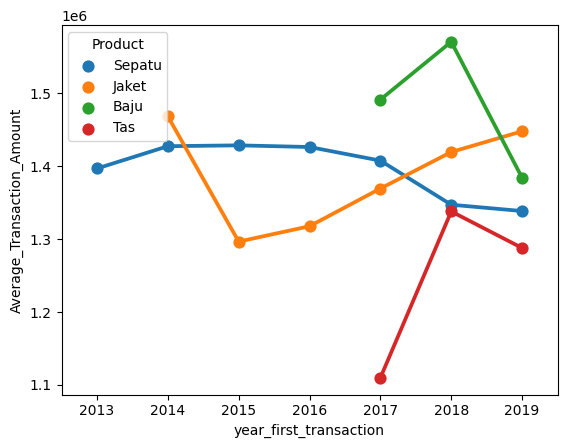

In [18]:
plt.clf()
sns.pointplot(data.groupby(['year_first_transaction','Product']).mean().reset_index(),x = 'year_first_transaction', y = 'Average_Transaction_Amount', hue='Product')
plt.show()

### Proporsi churned customer untuk setiap produk

In [19]:
df_piv = data.pivot_table(index='is_churn',
columns='Product',
values='Customer_ID',
aggfunc='count',
fill_value=0)

In [20]:
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

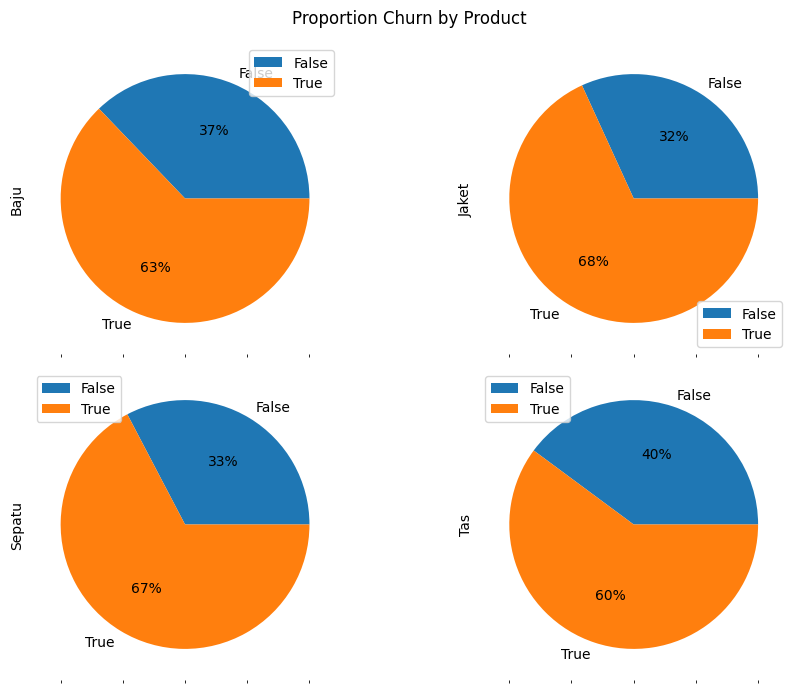

In [21]:
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
figsize=(10, 7),
layout=(-1, 2),
autopct='%1.0f%%',
title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

### Distribusi kategorisasi count transaction

In [22]:
def func(row):
  if row['Count_Transaction'] == 1:
    val='1.1'
  elif row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3:
    val='2.2 - 3'
  elif row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6:
    val='3.4 - 6'
  elif row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10:
    val='4.7 - 10'
  else:
    val='5. >10'
  return val



In [23]:
data['count_transaction_group'] = data.apply(func, axis=1)

<Figure size 640x480 with 0 Axes>

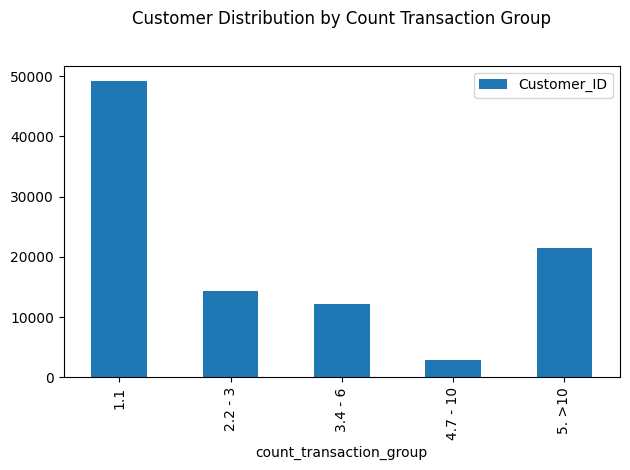

In [24]:
plt.clf()
dt_count = data.groupby('count_transaction_group')['Customer_ID'].count().reset_index()
dt_count.plot(x='count_transaction_group', y='Customer_ID', kind='bar')
plt.title('Customer Distribution by Count Transaction Group',fontsize=12, pad=30)
plt.tight_layout()
plt.show()

### Distribusi kategorisasi average transaction amount

In [45]:
def f(row):
  if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 250000):
    val='1.100.000-250000'
  elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
    val='2.>250.000-500.000'
  elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
    val='3.>500.000-750.000'
  elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
    val='4.>750.000-1.000.000'
  elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
    val='5.>1.000.000-2.500.000'
  elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
    val='6.>2.500.000-5.000.000'
  elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
    val='7.>5.000.000-10.000.000'
  else:
    val='8.>10.000.000'
  return val

In [46]:
data['average_transaction_amount_group'] = data.apply(f, axis=1)

In [47]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,year_first_transaction,year_last_transaction,count_transaction_group,average_transaction_amount_group
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018,5. >10,5.>1.000.000-2.500.000
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018,5. >10,5.>1.000.000-2.500.000
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,5. >10,2.>250.000-500.000
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019,5. >10,3.>500.000-750.000
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018,5. >10,5.>1.000.000-2.500.000


In [48]:
df_year = data.groupby(['average_transaction_amount_group'])['Customer_ID'].count()

<Axes: xlabel='average_transaction_amount_group'>

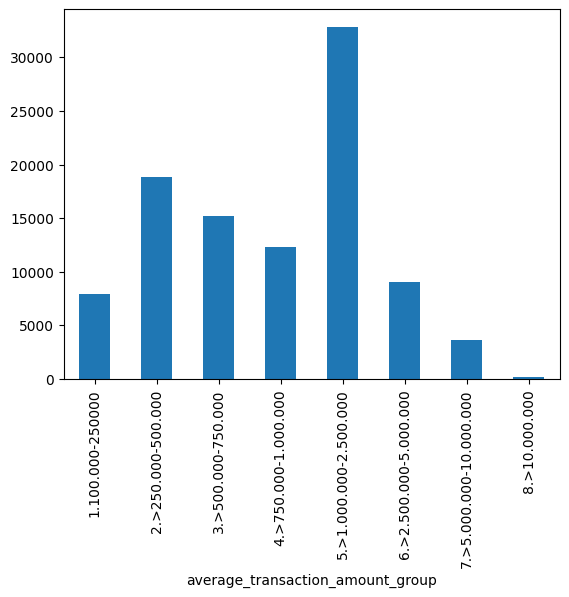

In [49]:
df_year.plot(x='average_transaction_amount_group', y='Customer_ID', kind='bar')